### Init

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Download data

#### Cases

In [2]:
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

Get rows from Poland and drop extra columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [4]:
pl_df = df[df.countriesAndTerritories == 'Poland']
pl_df = pl_df.drop(columns=['day','month','year','countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
pl_df['date'] = pd.to_datetime(pl_df['dateRep']).dt.date
pl_df = pl_df.drop(columns=['dateRep'])

In [5]:
pl_df

,cases,deaths,date
45392,8976,188,2020-12-14
45393,11499,502,2020-12-13
45394,13105,544,2020-12-12
45395,13750,470,2020-11-12
45396,12166,568,2020-10-12
...,...,...,...
45671,6,0,2020-10-03
45672,5,0,2020-09-03
45673,1,0,2020-08-03
45674,4,0,2020-07-03


#### Meteo

In [6]:
df = pd.read_csv('weather_data_filtered.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   utc_timestamp   8760 non-null   object 
 1   PL_temperature  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [8]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])

In [9]:
meteo_df = df.groupby(pd.Grouper(key='utc_timestamp', freq='D')).PL_temperature.mean().to_frame().reset_index()

In [10]:
meteo_df['date'] = meteo_df['utc_timestamp'].dt.date
meteo_df = meteo_df.drop(columns=['utc_timestamp'])

I found **free** data only for 2019...

In [11]:
meteo_df['date'] = meteo_df['date'].apply(lambda x: pd.datetime(x.year+1,x.month,x.day))
meteo_df['date'] = meteo_df['date'].dt.date

<ipython-input-11-9ecacb68bf99>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  meteo_df['date'] = meteo_df['date'].apply(lambda x: pd.datetime(x.year+1,x.month,x.day))


In [12]:
meteo_df

,PL_temperature,date
0,2.236833,2020-01-01
1,-0.348208,2020-01-02
2,-3.130500,2020-01-03
3,-2.965375,2020-01-04
4,-0.433792,2020-01-05
...,...,...
360,0.918833,2020-12-27
361,-1.360875,2020-12-28
362,-2.404625,2020-12-29
363,-0.260167,2020-12-30


### Joining dataframes

Remove rows with no data (about cases and deaths)

In [13]:
data_df = meteo_df.set_index('date').join(pl_df.set_index('date'), on='date')
data_df.dropna(subset = ["cases"], inplace=True) 

In [14]:
data_df.head(10)

,PL_temperature,cases,deaths
date,,,
2020-01-04,-2.965375,256.0,2.0
2020-01-05,-0.433792,237.0,20.0
2020-01-06,-4.683167,215.0,3.0
2020-01-07,-6.161000,239.0,19.0
2020-01-08,-2.350500,657.0,7.0
2020-01-09,-2.581667,502.0,6.0
2020-01-10,-6.081208,1552.0,30.0
2020-01-11,-5.673042,21897.0,280.0
2020-01-12,-0.382583,5736.0,121.0


### Plot data

In [15]:
data_df = data_df.reset_index() # we want dates on ax

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


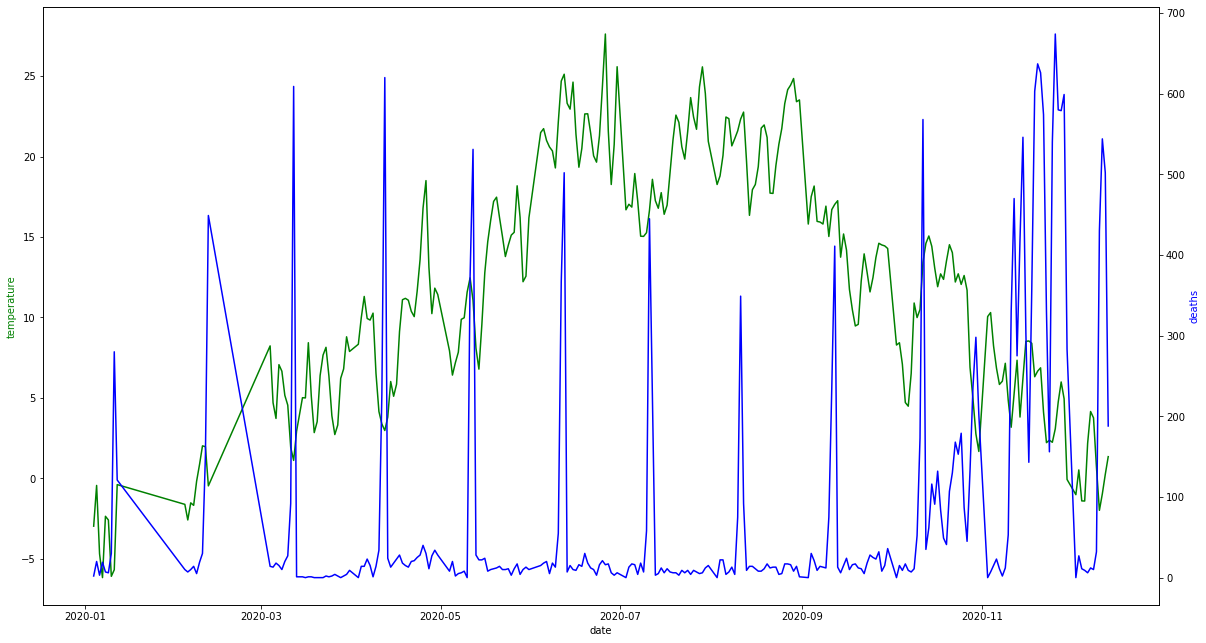

In [16]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 11)
ax2 = ax1.twinx()
ax1.plot(data_df['date'], data_df['PL_temperature'], 'g-')
ax2.plot(data_df['date'], data_df['deaths'], 'b-')

ax1.set_xlabel('date')
ax1.set_ylabel('temperature', color='g')
ax2.set_ylabel('deaths', color='b')

plt.show()

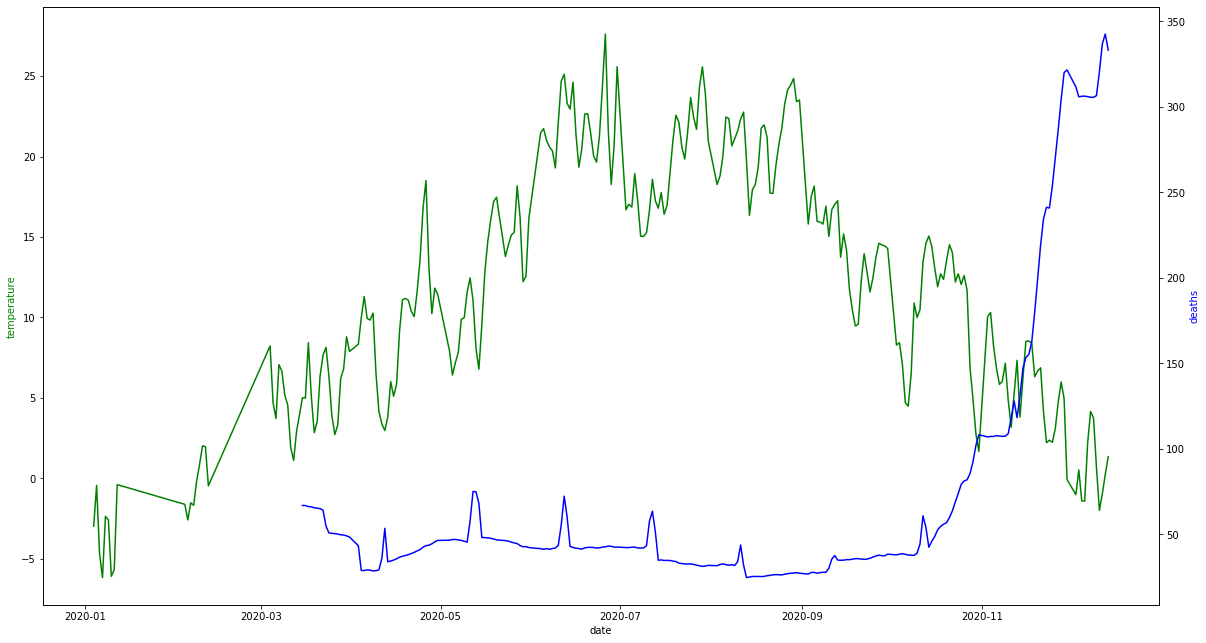

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 11)
ax2 = ax1.twinx()
ax1.plot(data_df['date'], data_df['PL_temperature'], 'g-')
ax2.plot(data_df['date'], data_df['deaths'].rolling(window = 30).mean(), 'b-')

ax1.set_xlabel('date')
ax1.set_ylabel('temperature', color='g')
ax2.set_ylabel('deaths', color='b')

plt.show()

Unfortunately, the data is badly corrupted, you can see rare unnatural large values ​​which hinder some dependencies. But when comparing the moving average, instead of the exact values, we can see a trend that at the beginning of the cold period (November / December) we have a sharp increase in the incidence.

